# Least Squares Approximation and Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Below, I plot the example we went over in class:

In [2]:
t = np.array([0,1,2])
b = np.array([6,0,0])

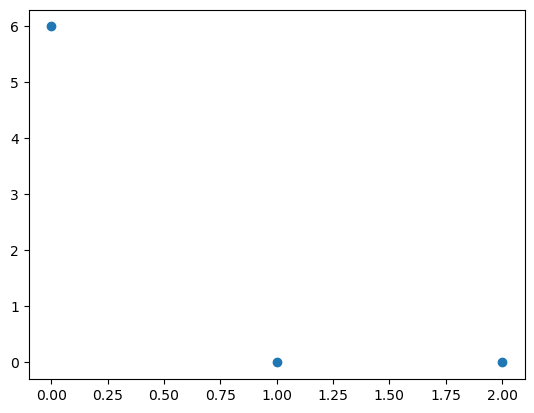

In [3]:
plt.scatter(t,b)

Suppose our goal was to find a line through all three points:

Such a line would have equation $b=C+tD$. 

To find these $C, D$, we would need to solve the following system:
$$
\begin{bmatrix}
1&0\\1&1\\1&2
\end{bmatrix} \begin{bmatrix} C\\D \end{bmatrix} = \begin{bmatrix} 6\\0\\0 \end{bmatrix}
$$

We'll see that this has no solution:

In [4]:
A = np.array([[1,0],
             [1,1],
             [1,2]])

# np.linalg.solve(A,b)

Here, NumPy is angry with us because $A$ is not a square matrix: oftentimes, when $A$ has more rows than columns, the system has no solution.

We can, however, find a line of best fit-- one that minimizes the error of each estimation. We do so by solving
$$A^TA\hat{x}=A^Tb,$$

where the components of $\hat{x}$ are the intercept and slope of our line!

In [5]:
#define the transpose
A_T = np.transpose(A)


#now we solve the system, like before
x_hat = np.linalg.solve(A_T.dot(A), A_T.dot(b))
x_hat

array([ 5., -3.])

From this, we see that our line of best fit is $5-3t$. We can see the values it predicts for the given inputs $t$ below:

$$
\begin{bmatrix}
1&0\\1&1\\1&2
\end{bmatrix} \hat{x} = \begin{bmatrix} 5\\2\\-1 \end{bmatrix}
$$

In [6]:
# projection of b is A times x_hat:

p = A.dot(x_hat)
p

array([ 5.,  2., -1.])

Finally, we plot the line of best fit (in red) along with the original points:

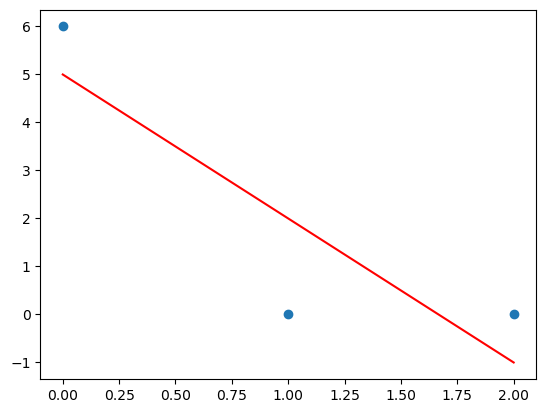

In [7]:
plt.scatter(t,b) # plots the original points
plt.plot(t,p, color='red') # plots the line of best fit

****
## Fitting a parabola to point data: we first need a neat trick

Linear regression, and least squares approximations as an extension, are an immensely powerful and flexible toolbox. I'll drop a couple buzzwords, and then we'll get into the meat and potatoes of what we mean here.

When we say we want to fit a linear function to data, we don't just mean a line. As it turns out, we can be even more clever!

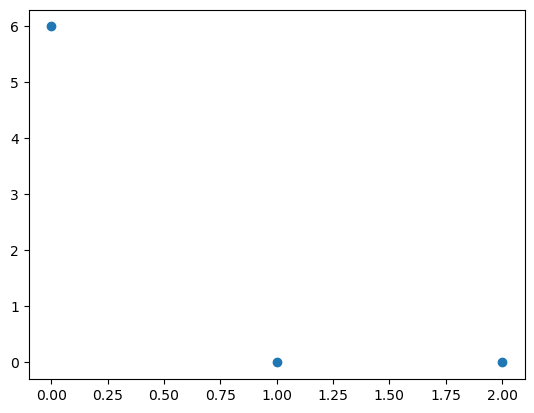

In [8]:
# re-define the points from the first example

t = np.array([0,1,2])

b = np.array([6,0,0])

plt.scatter(t,b)

Much like any two points define a line, any three points define a parabola, and we can gain a lot of power by modeling with higher-degree polynomials. Suppose we want to fit a parabola to these points: to figure out which parabola, we have to determine the coefficent of each term.

A parabola is given by the form $C + Dt + Et^2$. What does it mean for each point to lie on the parabola?

If the first point lies on the parabola, it means $C+D(0)+E(0)^2=6$

If the second point lies on the parabola, it means $C+D(1)+E(1)^2=0$

And if the third point lies on the parabola, it means $C+D(2)+E(2)^2=6$

Let's model this system of equations with vectors as matrices: for our three points to lie on our parabola, we need the following to hold:

$$
\begin{bmatrix}
1&0&0\\
1&1&1\\
1&2&4
\end{bmatrix}
\begin{bmatrix}
C\\D\\E
\end{bmatrix}
=
\begin{bmatrix}
6\\0\\0
\end{bmatrix}
$$

I want to pay special attention to the matrix on the left hand side of this equation, which we'll call $A$. The first column of $A$ is the all-ones vector. The second column of $A$ is the vector $t$, which is our set of inputs. And the third column of $A$ is the *square* of each entry in $t$.

We'll try (and succeed) to solve this system of equations, but first pay special attention to how we define the matrix $A$: it may be a little involved here, but I think it might help you later!

In [9]:
# first I make a 3 by 3 matrix, since A is 3 by 3. 
# I choose to make all the entries 1 because I know the first columns is all ones
A = np.ones((3,3))
A

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [10]:
# now we'll change the second and third columns. A note: in python, indices start at 0, so it thinks 
# that the left column is column 0, the middle columns is column 1, and the right is column 2


#below, we say 'take all of column 1 of A, and replace it with vector t'
A[:,1] = t 

#let's make sure that A looks good so far:
A

array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 2., 1.]])

In [11]:
# one more column to go: python lets us square each entry of a vector in an easy way:
t**2

array([0, 1, 4])

In [12]:
# we'll do what we did above:

A[:,2] = t**2 # 'take all of column 2 of A, and replace it with the square of each entry of t'

#check to see that A looks the way we want:
A

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 2., 4.]])

In [13]:
x = np.linalg.solve(A,b) # solve the system

x

array([ 6., -9.,  3.])

The above says that our system has a solution- because we had a three by three system, NumPy let us solve it. The vector x corresponds to the correct values of $C,D,$ and $E$.

So, the parabola passing through the three given points is $6-9t+3t^2$

We'll plot that below: I'll note that in this case, our plotting is a little more involved, because it is not a straight line!


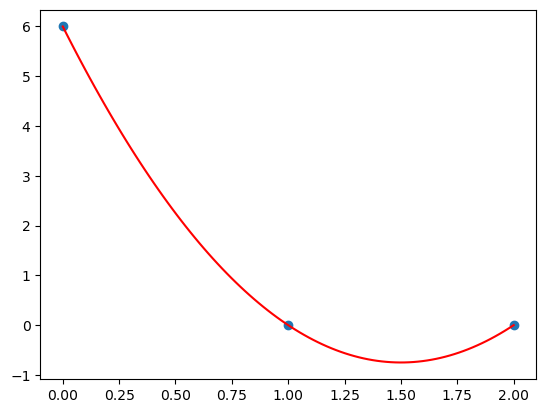

In [14]:
t_plot=np.linspace(0,2,100) # this just grabs 100 evenly spaced points between 0 and 2

#plot original three points
plt.scatter(t,b)

#plot approximation
plt.plot(t_plot,6-9*t_plot+3*t_plot**2, color='red')

Nice! I'd say this works pretty well! I'll note that we solve $Ax=b$ here directly: it will be up to you to figure out how to combine this idea with least squares approximations, like above. But please reach out with questions!

****
## Fitting a line to a bigger dataset

Here, we make a slightly larger example (with more points). Your goal is to find the line of best fit for the data!

In [15]:
# m is the number of points

m = 100

t = np.random.uniform(0,10,m)

b = 1+2*t+np.random.randn(m)

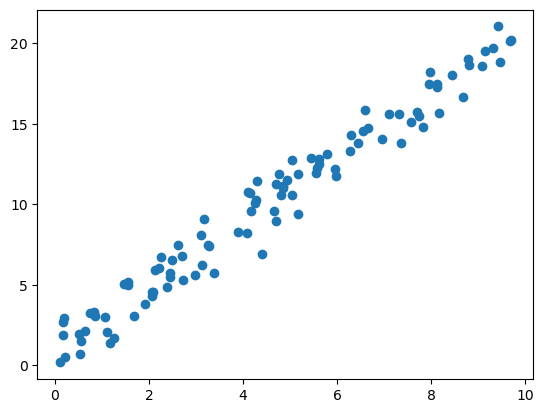

In [16]:
plt.scatter(t,b)

In [17]:
# your work here! find, and plot, the line of best fit

In [18]:
# Define A with 1s in the first column and t in the second column
A = np.ones((m,2))
A[:,1] = t
A[0:5,:]

array([[1.        , 3.27805108],
       [1.        , 4.26179756],
       [1.        , 4.39918307],
       [1.        , 1.24485352],
       [1.        , 2.06984311]])

In [19]:
# Define the transpose
A_T = np.transpose(A)
A_T[0:5,:]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [20]:
#now we solve the system, like before
x_hat = np.linalg.solve(A.T.dot(A), A.T.dot(b))
x_hat

array([1.0078583 , 1.98472887])

In [21]:
# projection of b is A times x_hat:
p = A.dot(x_hat)
p

array([ 7.51390092,  9.46637096,  9.73904394,  3.47855503,  5.11593567,
        2.4817688 ,  2.70600398,  7.71235211, 19.81090392,  1.32983281,
       10.25399364, 12.14788883,  9.30147047,  2.12079387,  5.0880018 ,
        8.72797485, 12.81579408,  7.31181238, 12.02388524,  5.87027213,
       16.83991486, 15.54417845, 19.49372363, 13.45744076, 10.53802756,
        1.99984478,  5.23167497,  3.926496  , 18.50248496, 12.07639741,
        6.21037287, 18.43012655,  9.1496289 ,  6.93325713, 10.63549066,
        4.81544757, 11.28671457, 10.99930194, 17.78431602, 15.11151186,
       11.25894684, 20.23991525, 13.52104638,  4.08563597, 14.82509453,
        9.52166225,  4.09739463,  6.41134155, 19.71530945, 11.02128509,
        4.3408804 ,  5.49050791,  9.49142029, 12.16062601,  1.37324254,
       11.82441614,  1.44145964, 16.28603114,  7.48407682,  3.22146239,
       14.08543267, 10.4530571 ,  7.19154654, 16.78428859, 19.16144816,
        5.84095431, 16.3641768 , 12.86757427,  5.38751064, 20.25

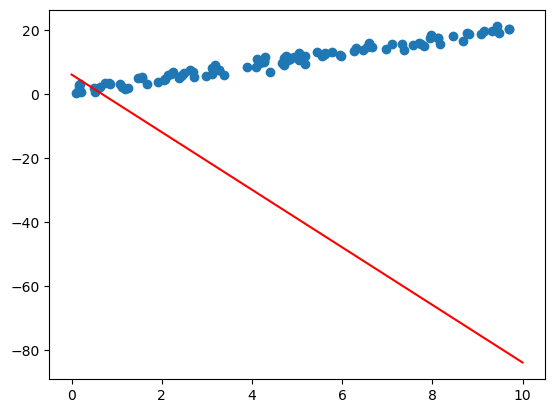

In [22]:
# Plot original points and line of best fit
t_plot = np.linspace(0,10,100)
plt.scatter(t,b)
plt.plot(t_plot, x_hat[0]+x_hat[1]*t_plot, color='red')

****
## Fitting a parabola to a bigger dataset

Your goal here is to find, and plot, a parabola of best fit for this dataset:

In [23]:
# m is the number of points

m = 100

t = np.random.uniform(0,10,m)

b = 15-6*t+2*t**2+6*np.random.randn(m)

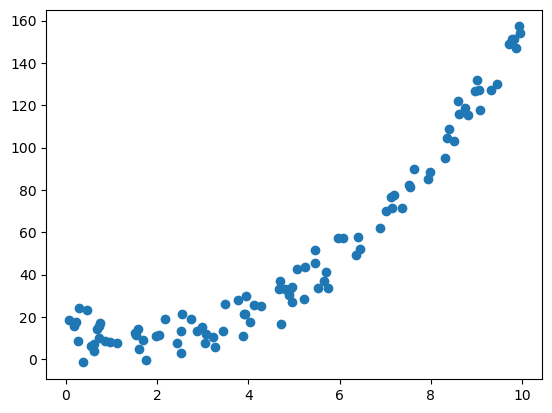

In [24]:
plt.scatter(t,b)

In [25]:
# your work here! find, and plot, the parabola of best fit

In [26]:
# Re-define A with 1s in the first column, t in the second column, and t^2 in the third column
A = np.ones((m,3))
A[:,1] = t
A[:,2] = t**2

In [27]:
# Define the transpose
A_T = np.transpose(A)

In [28]:
# Solve the system
x_hat = np.linalg.solve(A_T.dot(A), A_T.dot(b))

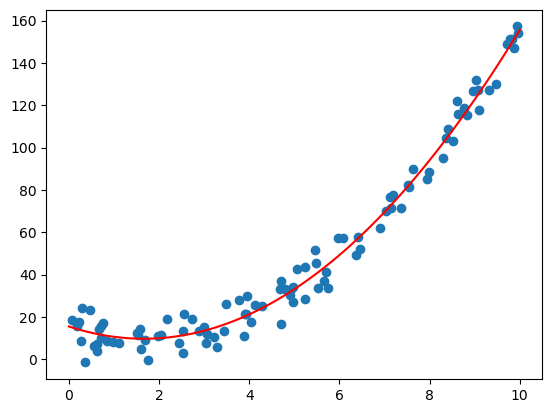

In [29]:
# Plot original points and parabola of best fit
t_plot = np.linspace(0,10,100)
plt.scatter(t,b)
plt.plot(t_plot, x_hat[0]+x_hat[1]*t_plot+x_hat[2]*t_plot**2, color='red')